In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
file_path = './Academic/Academic.csv'
df = pd.read_csv(file_path)


In [3]:

# Show the first few rows of the dataset
df.head()


,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,NaN,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


In [4]:
df.shape

(2000, 10)

In [5]:
df.columns

Index(['Study Hours per Week', 'Attendance Rate', 'Major', 'High School GPA',
       'Extracurricular Activities', 'Part-Time Job', 'Library Usage per Week',
       'Online Coursework Engagement', 'Sleep Hours per Night', 'College GPA'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Study Hours per Week          2000 non-null   float64
 1   Attendance Rate               1803 non-null   float64
 2   Major                         1941 non-null   object 
 3   High School GPA               2000 non-null   float64
 4   Extracurricular Activities    2000 non-null   int64  
 5   Part-Time Job                 2000 non-null   object 
 6   Library Usage per Week        2000 non-null   float64
 7   Online Coursework Engagement  1978 non-null   float64
 8   Sleep Hours per Night         1841 non-null   float64
 9   College GPA                   2000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.4+ KB


In [7]:
df.isna().sum()

Study Hours per Week              0
Attendance Rate                 197
Major                            59
High School GPA                   0
Extracurricular Activities        0
Part-Time Job                     0
Library Usage per Week            0
Online Coursework Engagement     22
Sleep Hours per Night           159
College GPA                       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(163)

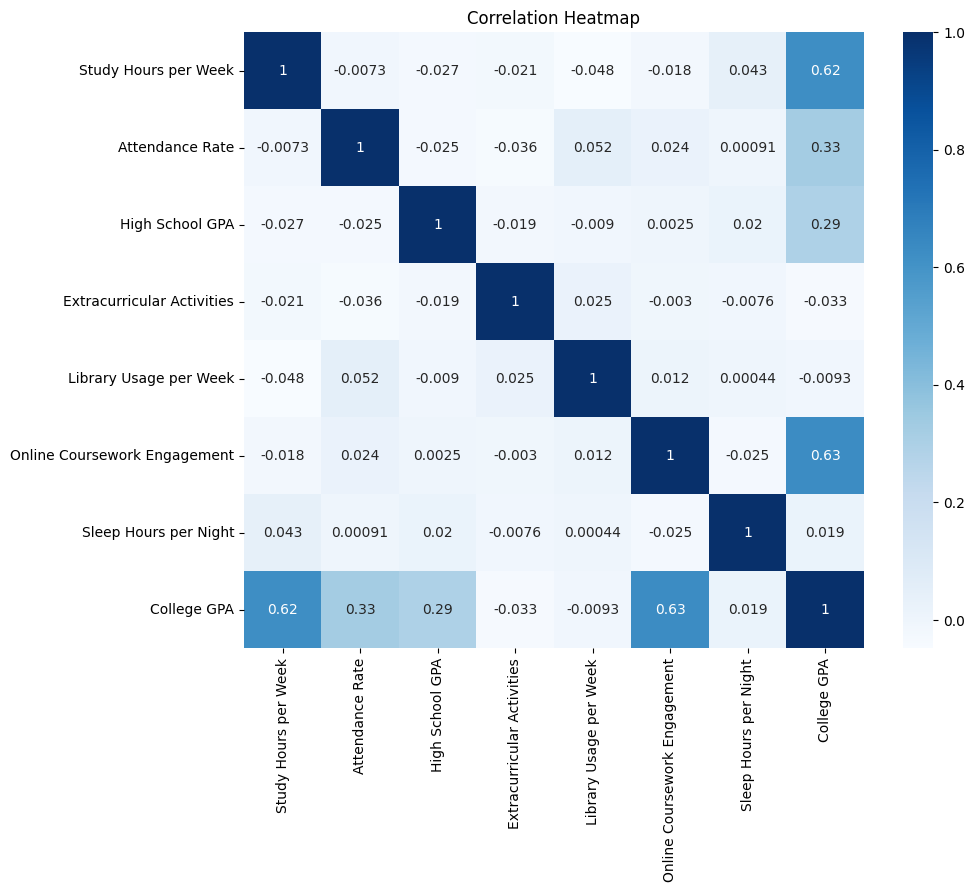

In [10]:

# Correlation Heatmap
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


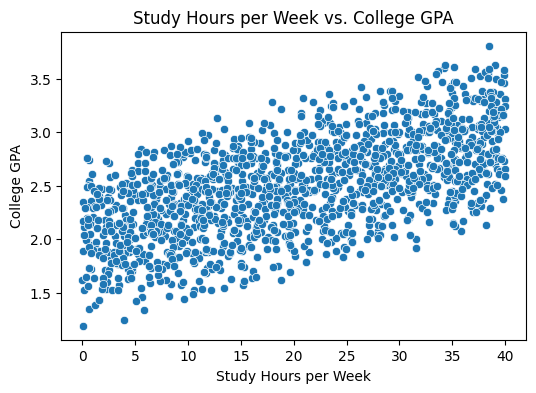

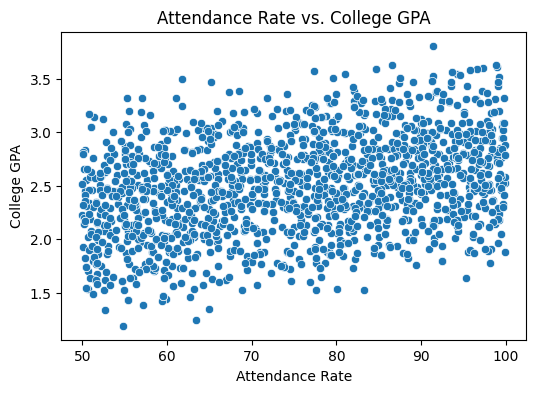

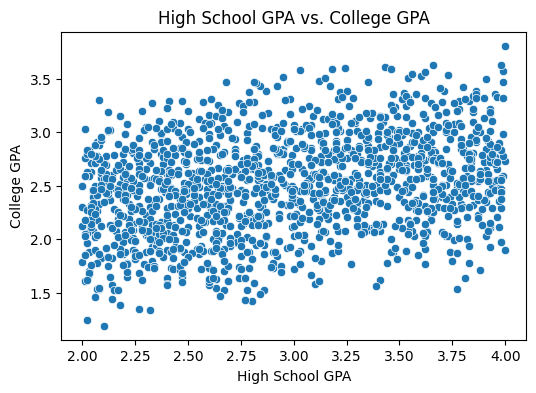

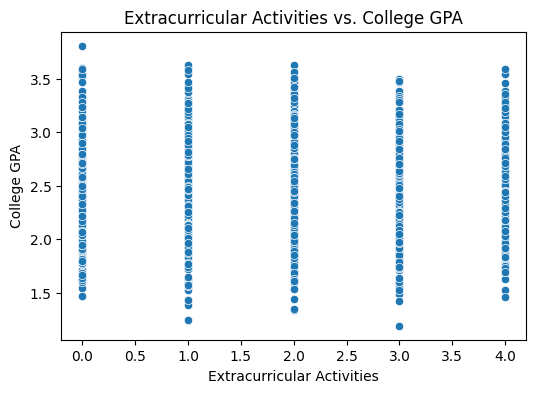

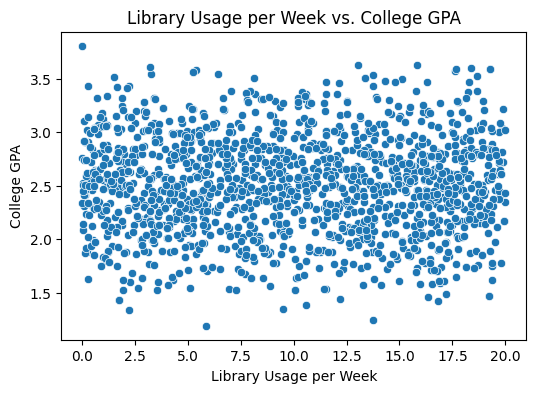

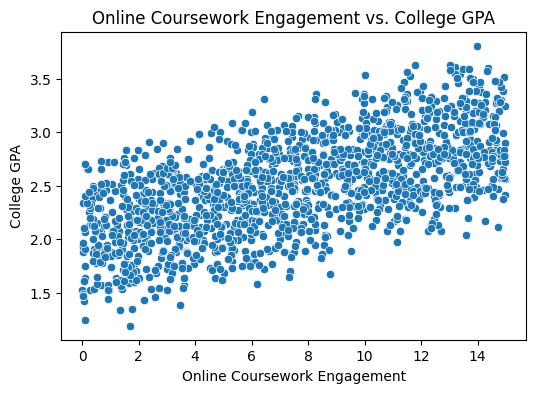

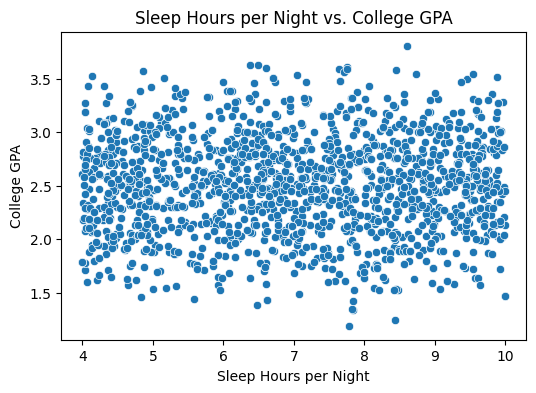

In [11]:

# Scatter plots of numerical features vs. GPA
target_column = 'College GPA'
for col in numerical_df.columns:
    if col != target_column:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=numerical_df[col], y=df[target_column])
        plt.title(f'{col} vs. {target_column}')
        plt.show()


In [12]:

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical missing values with mode
    else:
        df[col] = df[col].fillna(df[col].mean())  # Fill numerical missing values with mean


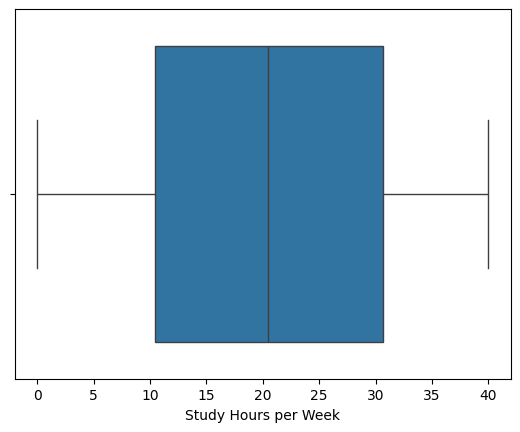

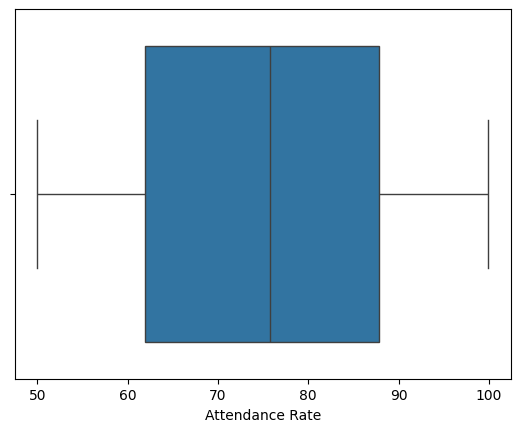

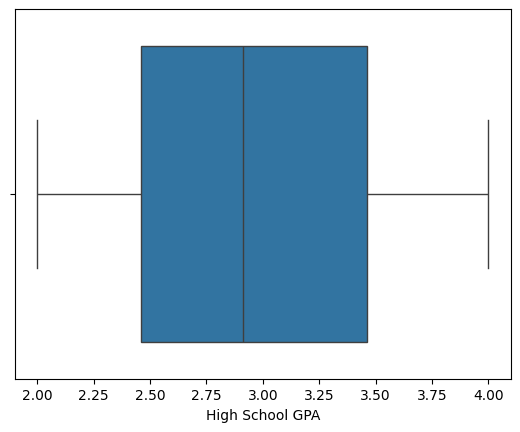

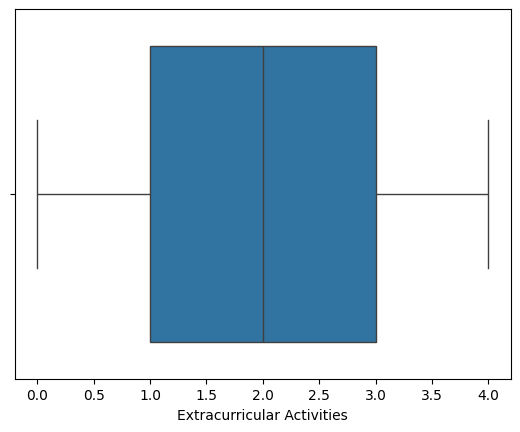

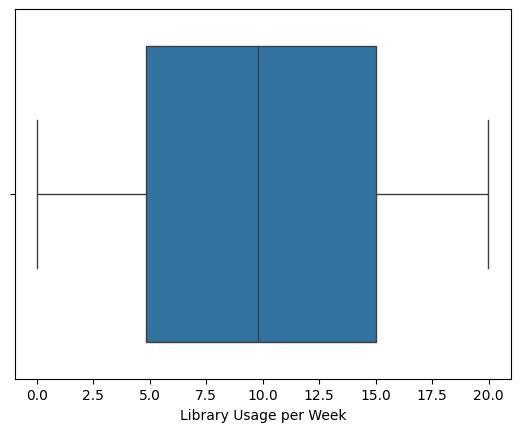

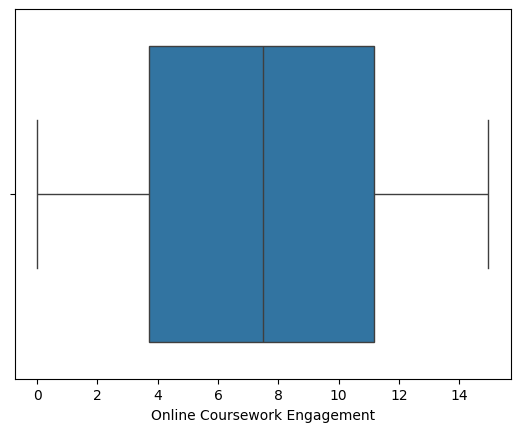

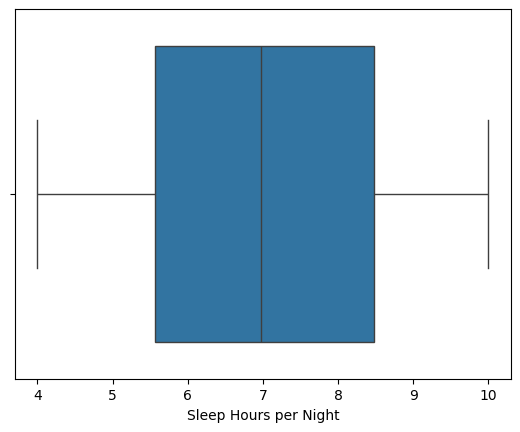

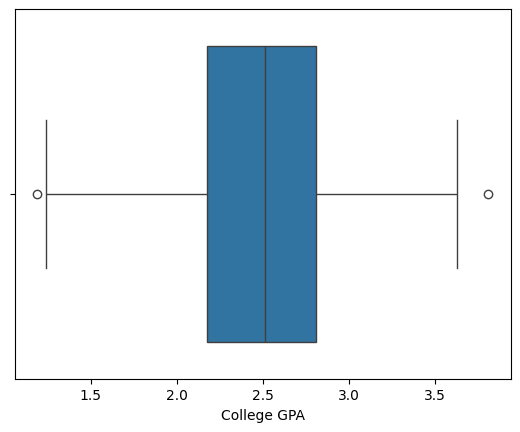

In [13]:

# Box plots to detect outliers
for col in df.columns:
    if df[col].dtype != object:
        sns.boxplot(x=df[col])
        plt.show()


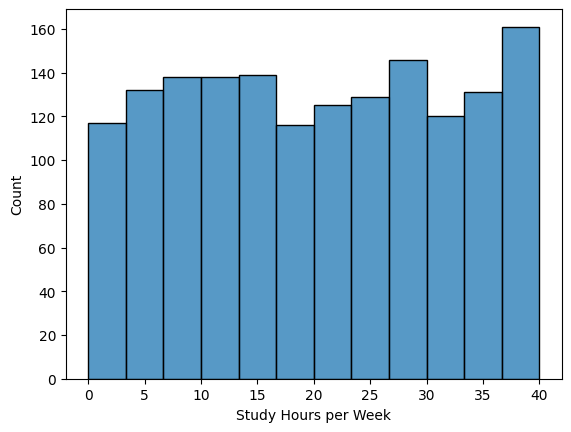

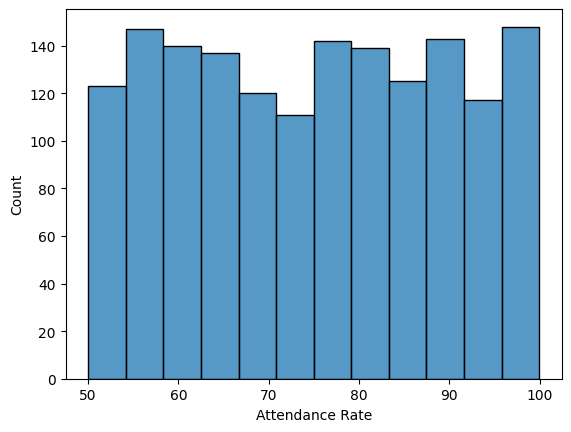

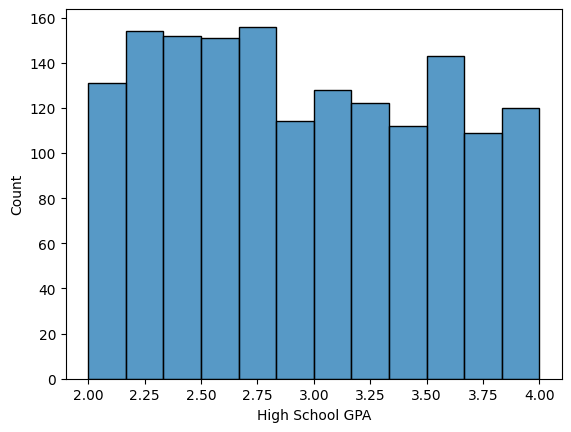

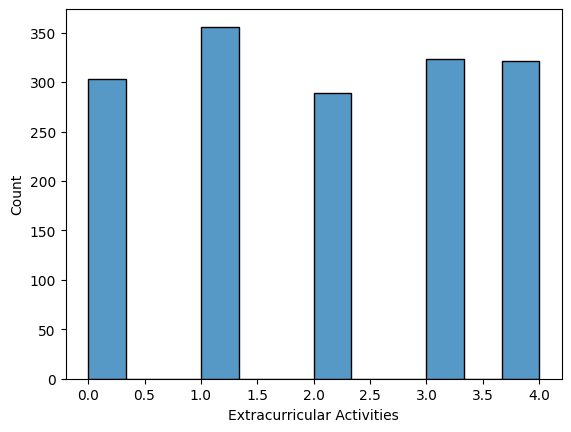

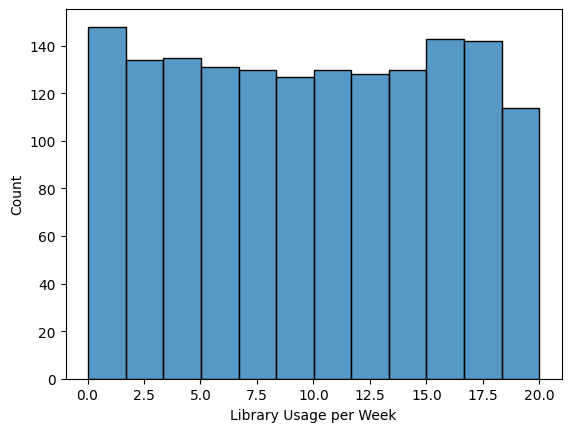

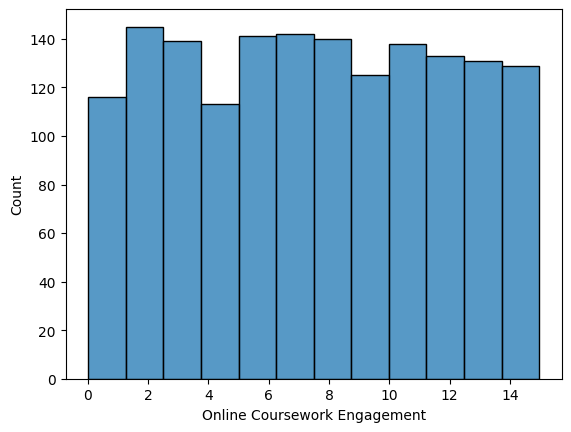

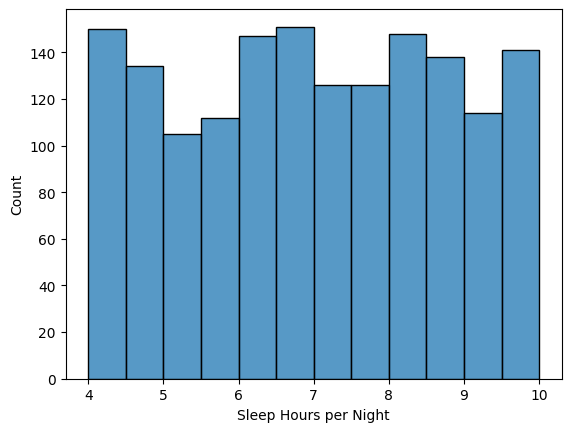

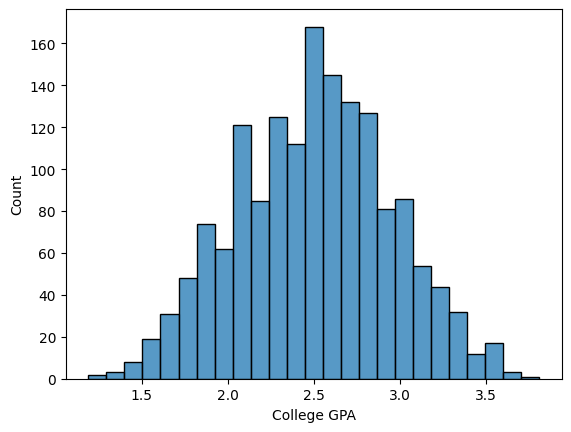

In [14]:

# Histograms to visualize distributions
for col in df.columns:
    if df[col].dtype != object:
        sns.histplot(x=df[col])
        plt.show()


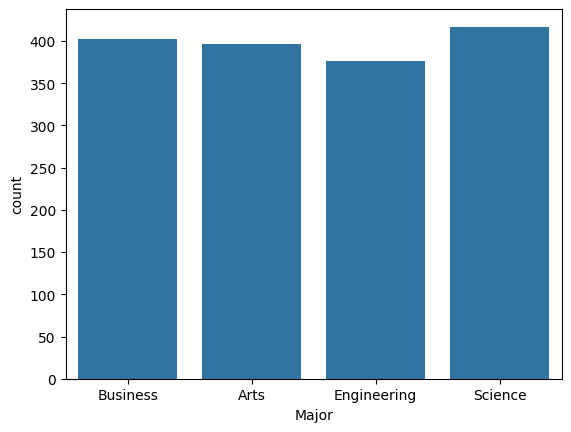

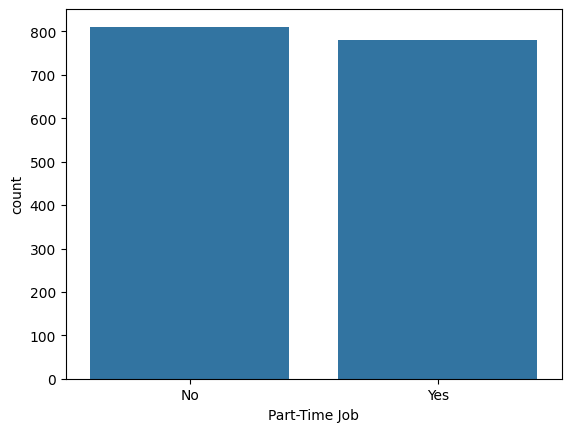

In [15]:

# Bar plot for categorical variables
for col in df.columns:
    if df[col].dtype == object:
        sns.countplot(x=df[col])
        plt.show()


In [16]:

# Handling outliers by using IQR method
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))


In [17]:

# Split the data into features (X) and target (y)
X = df.drop(columns=['College GPA'])
y = df['College GPA']


In [18]:

# Encode categorical variables
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [19]:

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [20]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:

# Initialize LinearRegressor
model = LinearRegression()
# Train Model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict test data
y_pred = model.predict(X_test)


Mean Squared Error: 8.96928651238623e-06
R^2 Score: 0.9999578605705769


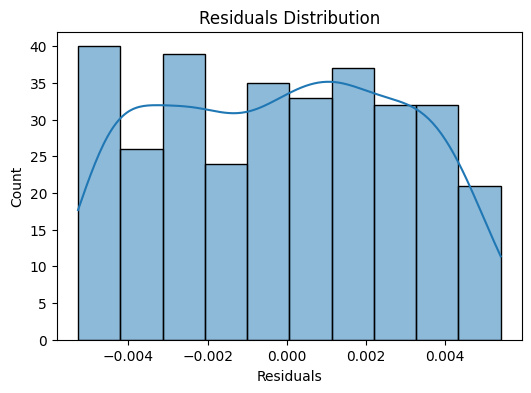

In [23]:
# Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

In [24]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.002585491215453592


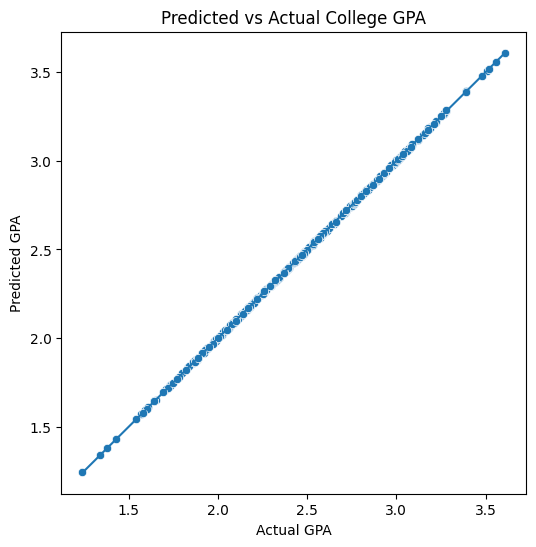

In [25]:
# Plot Predicted vs Actual GPA

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title("Predicted vs Actual College GPA")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.show()

In [26]:

# Initialize k-NN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can experiment with different values of k


In [27]:

# Train the k-NN model
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [28]:

# Predict using the trained model
y_pred = knn.predict(X_test)


In [29]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [30]:

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Mean Squared Error: 0.03
R^2 Score: 0.88
Mean Absolute Error: 0.13


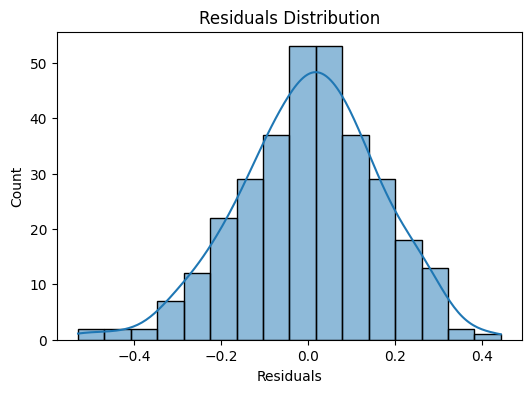

In [31]:

# Residuals analysis
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


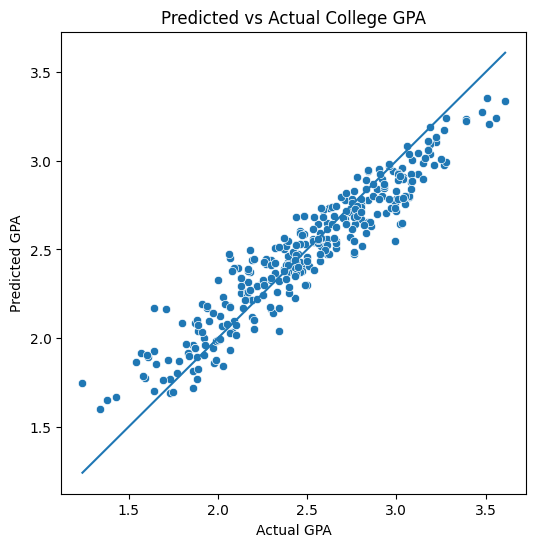

In [32]:

# Visualize Predicted vs Actual GPA
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title("Predicted vs Actual College GPA")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.show()